# We solve for the mass flux of CO2 into a SIP as a thin film on a wall 

I will use many of the same assumptions I discussed in 'Solvent Impregnated Polymers - Comparison with MECS'. In particular:
 - The dispersed solvent particles are assumed to be so small, that they do not prevent the concentration profile from being approximately one-dimensional, and absorption into these particles is treated as reaction-controlled.
 - The permeability of the polymer is assumed to be much higher than the permeability of the dispersed solvent particles, and so they do not contribute to the mass flux. 
 
Under these assumptions, the PDE describing flux into the wall is:

$$
 \frac{\partial c}{\partial t}  =  \mathcal{D}_{\text{poly}}\frac{\partial^2 c}{\partial x^2} -   \left( \frac{(1-\varepsilon) k\mathcal{S}_{\text{sol}}}{\varepsilon\mathcal{S}_{\text{poly}} } \right) c
$$

Subject to the BCs $c = mathcal{S}_{\text{poly}}p_0$ on the boundary at $x = \delta$, and $\frac{\partial c}{\partial x} = 0$ at $x = 0$. This problem has been solvent a billion times. It has a steady-state solution which is quickly converged to. In this case, it is:

$$
c(x) = \mathcal{S}_{\text{poly}} p_0 \frac{\cosh(\kappa x)}{\cosh(\kappa \delta)}
$$
where
$$
\kappa^2 = \frac{1}{\mathcal{D}_{\text{poly}}} \left( \frac{(1-\varepsilon) k\mathcal{S}_{\text{sol}}}{\varepsilon\mathcal{S}_{\text{poly}} } \right) =  \left( \frac{(1-\varepsilon) k\mathcal{S}_{\text{sol}}}{\varepsilon\mathcal{P}_{\text{poly}} } \right)
$$

Now, the flux of gas into the wall is given by:
$$
\text{Flux} = \mathcal{D}_{\text{poly}}\frac{\partial c}{\partial x}\Big|_{x=\delta}
$$
And so
$$
\text{Flux} = \mathcal{P}_{\text{poly}} p_0 \kappa \tanh(\kappa \delta)
$$

with the same $\kappa$ as above. It is clear from the equation how we have both reaction-controlled regimes ($\delta << x$) and diffusion controlled regimes ($\delta >> x$).

### A General purpose flux calculation

As a first step, we'll create a general-purpose flux calculation. We'll then see how long the residence-time of the gas would be inside our container before 90\% of the CO2 is removed. In a sense, this will be a calculation of the length of the MTZ. I'll need to think about this a little more. I'll then get some estimates for pressure drop. I will also want to compare the heat transfer through PDMS/solvent networks, accounting for the enthalpy of reaction that needs to be overcome. I should make these models as general as possible, so I can substitute other physical properties into them.

In [52]:
function FluxCartesian(P_poly,S_sol,ɛ,k,delta,p0)
    kappa = sqrt(((1-ɛ)*k*S_sol) / (ɛ*P_poly))
    Flux = P_poly * p0 * kappa * tanh(kappa*delta)
    return [Flux,kappa*delta]
end

#I'll also define a FluxSpherical Function
function FluxSpherical(P_poly,S_sol,ɛ,k,R,p0)
    phi = R*sqrt(((1-ɛ)*k*S_sol) / (ɛ*P_poly))
    Flux = P_poly*p0*phi/R* (phi*coth(phi) - 1)
    return [Flux, phi]
end

FluxSpherical (generic function with 1 method)

### Flux for Unpromoted K2CO3 

In [54]:
p0 = 10e3
P_poly = 3260 * 3.34e-16
S_sol = 2.8e-4
D_sol = 1e-9
k = 20
ɛ = 0.5
delta = 100e-6

FluxCartesian(P_poly,S_sol,eps,k,delta,p0)[1]

0.0007808642397232126

Surprisingly, the Thiele Modulus isn't small. I need to think about this more systematically. The main reason is the diffusivity doesn't actually decrease all that much - maybe by a factor of 5 in this case. With the salting out effect, this will be more significant.

In [55]:
using PyPlot

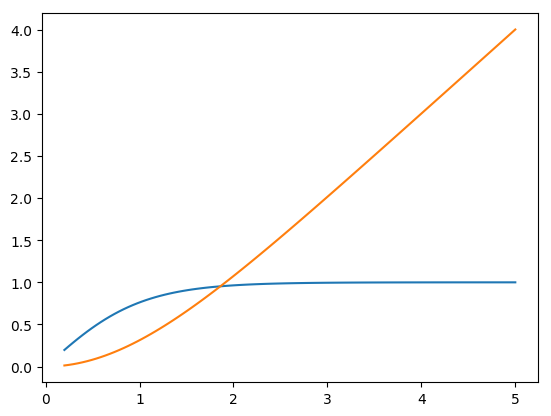

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x327005b10>

In [56]:
x = linspace(0.2,5,100)
plot(x, tanh(x))
plot(x, x.*coth(x) - 1)